Importamos las librerías
Pegar archivo database_df_fechas_y_dhn.pkl

In [760]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from google.colab import drive
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, roc_auc_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer



Importamos los datos provenientes del Colab 1

In [761]:
path_database_info_completa='/content/database_df_fechas_y_dhn (1).pkl'

df=pd.read_pickle(path_database_info_completa)


Analizamos, si hay outliers

In [762]:
df



,Fecha Reunión + 1 BD,Publicacion Minuta + 1 BD,Fecha Siguiente Reunión + 1 BD,Decisión Política Monetaria,Fed Target Rate,Effective Fed Funds Rate,Tasa 3 Meses,Dovish,Hawkish,Neutral
index,,,,,,,,,,
1995-02-01,1995-02-02,1995-04-03,1995-03-29,0.00,6.000,6.28,5.70,0.041030,0.309371,0.649599
1995-03-28,1995-03-29,1995-05-29,1995-05-24,0.00,6.000,5.97,5.66,0.127621,0.207176,0.665203
1995-05-23,1995-05-24,1995-07-10,1995-07-07,-0.25,5.750,5.78,5.36,0.190530,0.221339,0.588130
1995-07-06,1995-07-07,1995-08-28,1995-08-23,0.00,5.750,5.72,5.31,0.207284,0.187037,0.605679
1995-08-22,1995-08-23,1995-10-02,1995-09-27,0.00,5.750,5.93,5.26,0.132782,0.176945,0.690272
...,...,...,...,...,...,...,...,...,...,...
2023-06-14,2023-06-15,2023-07-06,2023-07-27,0.25,5.125,5.08,5.23,0.100451,0.410815,0.488733
2023-07-26,2023-07-27,2023-08-17,2023-09-21,0.00,5.375,5.33,5.29,0.158601,0.479939,0.361460
2023-09-20,2023-09-21,2023-10-12,2023-11-02,0.00,5.375,5.33,5.35,0.135375,0.452688,0.411937


Eliminamos los NaN y modificamos la columna Decisión Política Monetaria y la hacemos categórica

In [763]:
df=df[['Fed Target Rate', 'Effective Fed Funds Rate', "Decisión Política Monetaria",'Tasa 3 Meses', 'Dovish','Hawkish','Neutral']].dropna(how='any')
df['Decisión Política Monetaria'] = np.where(df['Decisión Política Monetaria'] > 0.001, 1, np.where(df['Decisión Política Monetaria'] < -0.001, -1, 0))

Grafico con las decisiones tomadas por la Fed

<Axes: xlabel='index'>

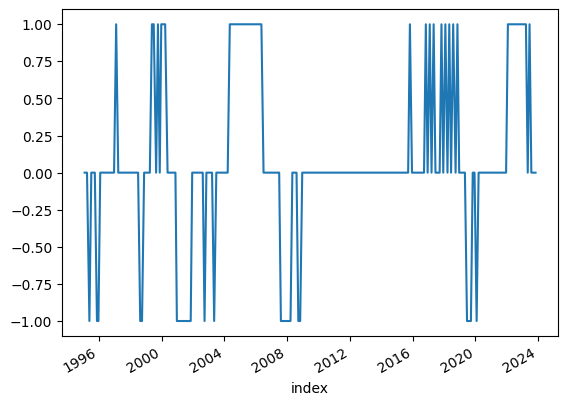

In [764]:
df["Decisión Política Monetaria"].plot()

In [765]:
df

,Fed Target Rate,Effective Fed Funds Rate,Decisión Política Monetaria,Tasa 3 Meses,Dovish,Hawkish,Neutral
index,,,,,,,
1995-02-01,6.000,6.28,0,5.70,0.041030,0.309371,0.649599
1995-03-28,6.000,5.97,0,5.66,0.127621,0.207176,0.665203
1995-05-23,5.750,5.78,-1,5.36,0.190530,0.221339,0.588130
1995-07-06,5.750,5.72,0,5.31,0.207284,0.187037,0.605679
1995-08-22,5.750,5.93,0,5.26,0.132782,0.176945,0.690272
...,...,...,...,...,...,...,...
2023-05-03,5.125,5.08,0,5.21,0.137240,0.373069,0.489690
2023-06-14,5.125,5.08,1,5.23,0.100451,0.410815,0.488733
2023-07-26,5.375,5.33,0,5.29,0.158601,0.479939,0.361460


Dividimos los datos en 3 dataset distintos: Train, Test & Validation

A los datos los balanceamos y a las columnas categóricas las convertimos a un formato "one-hot encoding"

### Division de Fechas

In [766]:
train_end_date = pd.Timestamp('2017-12-31')
val_start_date = pd.Timestamp('2018-01-01')
val_end_date = pd.Timestamp('2018-12-31')
train_set = df[df.index <= train_end_date]


###Train

In [767]:
X_train=train_set.drop(columns=['Decisión Política Monetaria'])
y_train1=train_set['Decisión Política Monetaria']
y_train_logistic=y_train1.astype(int)


### Validation

In [768]:
val_train_set = df[(df.index >= val_start_date) & (df.index <= val_end_date)]
X_val=val_train_set.drop(columns=['Decisión Política Monetaria'])
y_val1=val_train_set['Decisión Política Monetaria']
y_val=to_categorical(y_val1,num_classes=3)

### Test

In [769]:
test_set = df[df.index > val_end_date]
X_test=test_set.drop(columns=['Decisión Política Monetaria'])
y_test=test_set['Decisión Política Monetaria']
y_test1=test_set['Decisión Política Monetaria']
y_test=to_categorical(y_test1,num_classes=3)

### Balanceado (SMOTE)

In [770]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train1)

len(X_train_smote), len(y_train_smote)

(393, 393)

### Categorical

In [771]:
y_train=to_categorical(y_train_smote,num_classes=3)

###Data sin informacion de las minutas

In [772]:
X_train_sin_info_minuta=X_train_smote[['Fed Target Rate', 'Effective Fed Funds Rate', 'Tasa 3 Meses']]
X_test_sin_info_minuta=X_test[['Fed Target Rate', 'Effective Fed Funds Rate','Tasa 3 Meses']]
X_val_sin_info_minuta=X_val[['Fed Target Rate', 'Effective Fed Funds Rate', 'Tasa 3 Meses']]


Funciones:

- Matriz de confusión

- Métricas importantes

In [773]:
def confusion_matrix_graph(y_test, y_pred):

  conf_matrix = confusion_matrix(y_test, y_pred)

  # Display the confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
              xticklabels=['Class -1', 'Class 0', 'Class 1'],
              yticklabels=['Class -1', 'Class 0', 'Class 1'])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

In [774]:
def metricas(y, y_pred, y_proba):
    metrics_dict = {
        "accuracy": accuracy_score(y, y_pred),
        "f1": f1_score(y, y_pred, average='macro'),
        "recall": recall_score(y, y_pred, average='macro'),
        "precision": precision_score(y, y_pred, average='macro'),
        "roc_auc_score": roc_auc_score(y, y_proba, multi_class='ovo'),
        "log_loss": log_loss(y, y_proba)
    }

    metrics_series = pd.Series(metrics_dict)

    # # Plot bar graph
    plt.figure(figsize=(7, 7))
    ax = metrics_series.plot(kind='bar', colormap='viridis', edgecolor='white', alpha=0.7)

    plt.title('Classification Metrics by Class')
    plt.ylabel('Metric Value')
    plt.xlabel('Class')
    plt.xticks(rotation=0)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    return metrics_series

In [775]:
def metricas_comparacion(y, y_pred_1, y_proba_1, y_pred_2, y_proba_2):
    metrics_dict_1 = {
        "accuracy": accuracy_score(y, y_pred_1),
        "f1": f1_score(y, y_pred_1, average='macro'),
        "recall": recall_score(y, y_pred_1, average='macro'),
        "precision": precision_score(y, y_pred_1, average='macro'),
        "roc_auc_score": roc_auc_score(y, y_proba_1, multi_class='ovo'),
        "log_loss": log_loss(y, y_proba_1)
    }
    metrics_dict_2 = {
        "accuracy": accuracy_score(y, y_pred_2),
        "f1": f1_score(y, y_pred_2, average='macro'),
        "recall": recall_score(y, y_pred_2, average='macro'),
        "precision": precision_score(y, y_pred_2, average='macro'),
        "roc_auc_score": roc_auc_score(y, y_proba_2, multi_class='ovo'),
        "log_loss": log_loss(y, y_proba_2)
    }
    metrics_series_1 = pd.Series(metrics_dict_1)
    metrics_series_2 = pd.Series(metrics_dict_2)
    df_final=pd.DataFrame({"modelos 1":metrics_series_1,
                           "Modelos 2":metrics_series_2})
        # Plotting both series on the same graph
    plt.plot(metrics_series_1, label='Modelo 1', marker='o')
    plt.plot(metrics_series_2, label='Modelo 2', marker='o')
        # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Comparison of Metrics 1 and Metrics 2')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    return df_final


In [776]:
def metricas_comparacion_1(y, y_pred_1, y_proba_1, y_pred_2, y_proba_2,y_pred_3, y_proba_3,y_pred_4, y_proba_4 ):



    metrics_dict_1 = {
        "accuracy": accuracy_score(y, y_pred_1),
        "f1": f1_score(y, y_pred_1, average='macro'),
        "recall": recall_score(y, y_pred_1, average='macro'),
        "precision": precision_score(y, y_pred_1, average='macro'),
        "roc_auc_score": roc_auc_score(y, y_proba_1, multi_class='ovo'),
        "log_loss": log_loss(y, y_proba_1)
    }

    metrics_dict_2 = {
            "accuracy": accuracy_score(y, y_pred_2),
            "f1": f1_score(y, y_pred_2, average='macro'),
            "recall": recall_score(y, y_pred_2, average='macro'),
            "precision": precision_score(y, y_pred_2, average='macro'),
            "roc_auc_score": roc_auc_score(y, y_proba_2, multi_class='ovo'),
            "log_loss": log_loss(y, y_proba_2)
        }
    metrics_dict_3 = {
            "accuracy": accuracy_score(y, y_pred_3),
            "f1": f1_score(y, y_pred_3, average='macro'),
            "recall": recall_score(y, y_pred_3, average='macro'),
            "precision": precision_score(y, y_pred_3, average='macro'),
            "roc_auc_score": roc_auc_score(y, y_proba_3, multi_class='ovo'),
            "log_loss": log_loss(y, y_proba_3)
      }

    metrics_dict_4 = {
            "accuracy": accuracy_score(y, y_pred_4),
            "f1": f1_score(y, y_pred_4, average='macro'),
            "recall": recall_score(y, y_pred_4, average='macro'),
            "precision": precision_score(y, y_pred_4, average='macro'),
            "roc_auc_score": roc_auc_score(y, y_proba_4, multi_class='ovo'),
            "log_loss": log_loss(y, y_proba_4)
      }






    metrics_series_1 = pd.Series(metrics_dict_1)
    metrics_series_2 = pd.Series(metrics_dict_2)
    metrics_series_3 = pd.Series(metrics_dict_3)
    metrics_series_4 = pd.Series(metrics_dict_4)
    df_final=pd.DataFrame({"Logistic sin Minutas":metrics_series_1,
                           "Logistic con Minutas":metrics_series_2,
                           "Red Neuronal sin Minutas":metrics_series_3,
                           "Red Neuronal con Minutas":metrics_series_4
                           })



        # Plotting both series on the same graph
    plt.plot(metrics_series_1, label='Logistic sin Minutas', marker='o')
    plt.plot(metrics_series_2, label='Logistic con Minutas', marker='o')
    plt.plot(metrics_series_3, label='Red Neuronal sin Minutas', marker='o')
    plt.plot(metrics_series_4, label='Red Neuronal con Minutas', marker='o')


        # Adding labels and title
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Comparación métricas de modelos')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()
    return df_final


## Primer Modelo: Logistic Regression

Analizamos los datos sin tener en cuenta las informacion provista por las minutas y usamos un modelo Lineal

Para LogisticRegression usar:


**Para entrenar:** X_train_logistic, y_train_smote

**Para testear:** X_test_logistic, y_test1

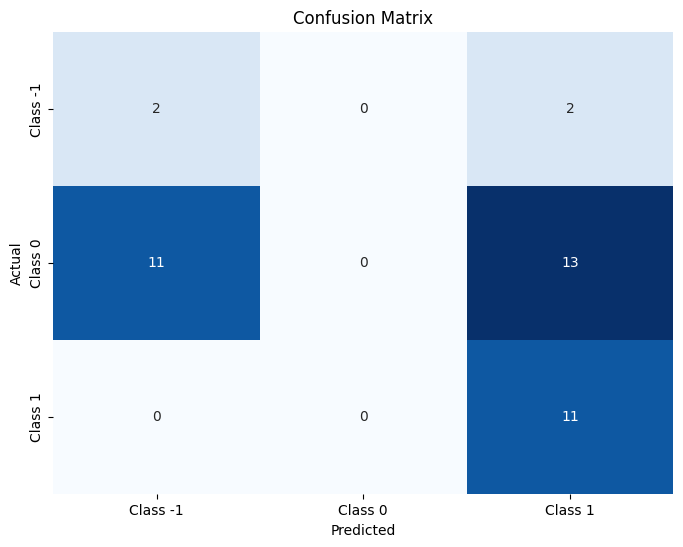

In [777]:
lr = LogisticRegression(random_state=42, class_weight='balanced', fit_intercept=False)
lr.fit(X_train_sin_info_minuta, y_train_smote)
y_pred_1 = lr.predict(X_test_sin_info_minuta)
y_prob_1=lr.predict_proba(X_test_sin_info_minuta)

confusion_matrix_graph(y_test1, y_pred_1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


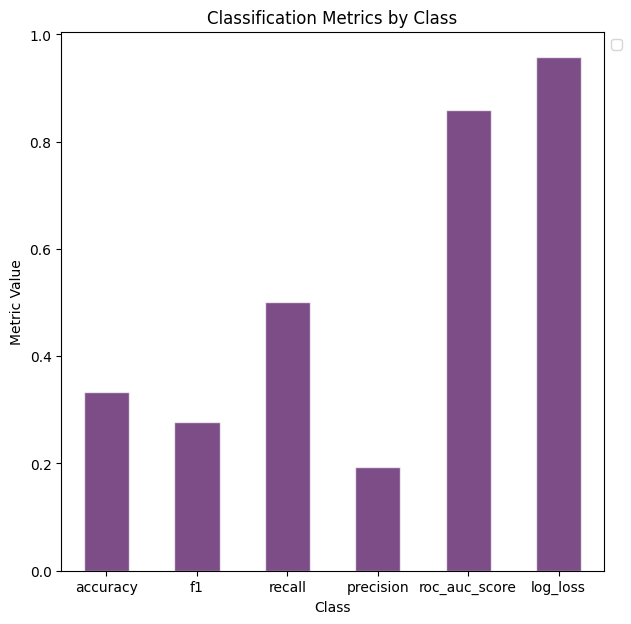

accuracy         0.333333
f1               0.276630
recall           0.500000
precision        0.192308
roc_auc_score    0.858112
log_loss         0.957265
dtype: float64

In [778]:
metricas(y_test1,y_pred_1,y_prob_1)

## Logistic regression Dovish, Hawkish, Neutral

In [779]:
lr = LogisticRegression(random_state=42,fit_intercept=False)
lr.fit(X_train_smote, y_train_smote)
y_pred_2 = lr.predict(X_test)
y_prob_2=lr.predict_proba(X_test)

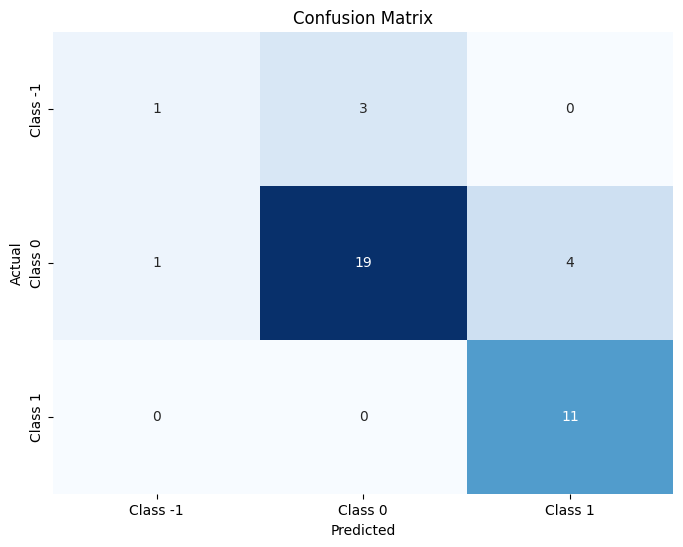

In [780]:
confusion_matrix_graph(y_test1, y_pred_2)

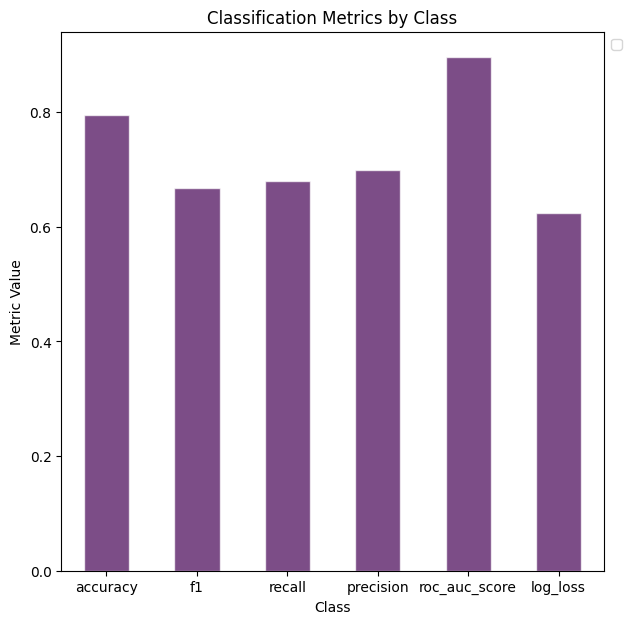

accuracy         0.794872
f1               0.668525
recall           0.680556
precision        0.698990
roc_auc_score    0.895833
log_loss         0.624532
dtype: float64

In [781]:
metricas(y_test1,y_pred_2,y_prob_2)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


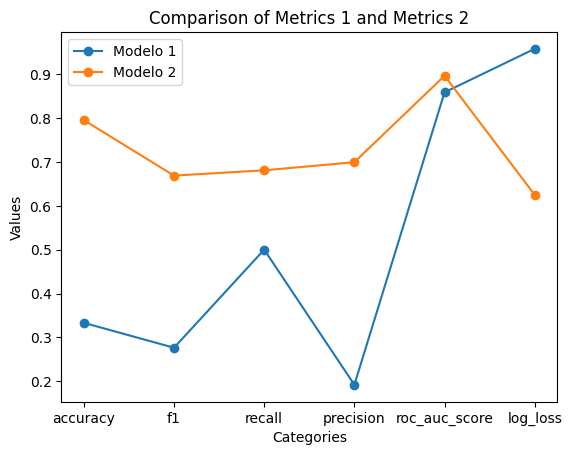

,modelos 1,Modelos 2
accuracy,0.333333,0.794872
f1,0.276630,0.668525
recall,0.500000,0.680556
precision,0.192308,0.698990
roc_auc_score,0.858112,0.895833
log_loss,0.957265,0.624532


In [782]:
metricas_comparacion(y_test1,y_pred_1,y_prob_1,y_pred_2,y_prob_2)

##Segundo Modelo: MLP

Utilizamos un modelo de redes neuronales sin la informacion provista por las minutas

Para MLP usar:


**Para entrenar:** X_train_logistic, y_train

**Para validación:** X_val_logistic, y_val

**Para testear:** X_test_logistic, y_test1

In [783]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

In [784]:
patience=20
learning_rate=0.001
MAX_EPOCHS = 500
model=dense
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                    patience=patience,
                                                      mode='min')

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train_sin_info_minuta, y_train, epochs=MAX_EPOCHS, validation_data=(X_val_sin_info_minuta,y_val),batch_size=30, callbacks=[early_stopping])

Epoch 1/500
14/14 [==============================] - 2s 26ms/step - loss: 1.0894 - accuracy: 0.3919 - val_loss: 1.1528 - val_accuracy: 0.5000
Epoch 2/500
14/14 [==============================] - 0s 9ms/step - loss: 1.0688 - accuracy: 0.5191 - val_loss: 1.1465 - val_accuracy: 0.1250
Epoch 3/500
14/14 [==============================] - 0s 8ms/step - loss: 1.0559 - accuracy: 0.5674 - val_loss: 1.1095 - val_accuracy: 0.5000
Epoch 4/500
14/14 [==============================] - 0s 8ms/step - loss: 1.0343 - accuracy: 0.5649 - val_loss: 1.0240 - val_accuracy: 0.5000
Epoch 5/500
14/14 [==============================] - 0s 8ms/step - loss: 1.0262 - accuracy: 0.5623 - val_loss: 1.0629 - val_accuracy: 0.5000
Epoch 6/500
14/14 [==============================] - 0s 6ms/step - loss: 0.9989 - accuracy: 0.6310 - val_loss: 1.0119 - val_accuracy: 0.5000
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.9786 - accuracy: 0.6641 - val_loss: 0.9368 - val_accuracy: 0.5000
Epoch 8/500


In [785]:
predicted_classes=model.predict(X_test_sin_info_minuta)

2/2 [==============================] - 0s 5ms/step


In [786]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
predictions_1 = model.predict(X_test_sin_info_minuta)
predicted_classes_1 = np.argmax(predictions_1, axis=1)
predicted_classes_1=np.where(predicted_classes_1 == 2, -1, np.where(predicted_classes_1 ==1, 1, 0))

predicted_classes_1


2/2 [==============================] - 0s 5ms/step


array([ 1,  1,  1, -1,  1, -1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1])

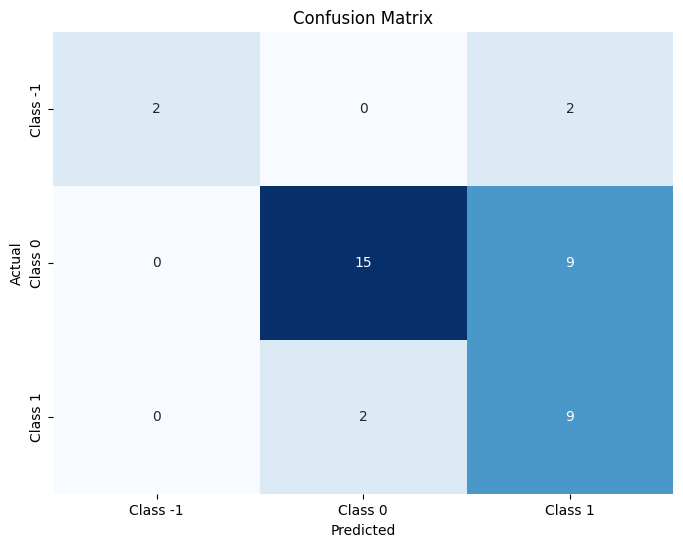

In [787]:
confusion_matrix_graph(y_test1, predicted_classes_1)


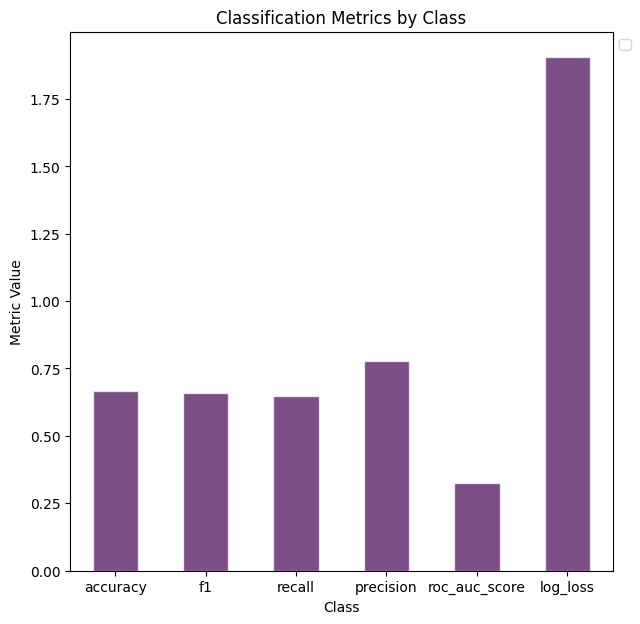

accuracy         0.666667
f1               0.659673
recall           0.647727
precision        0.777451
roc_auc_score    0.323390
log_loss         1.904556
dtype: float64

In [788]:
metricas(y_test1,predicted_classes_1,predictions_1)

##MLP con información adicional de las minutas

Utilizamosla información de las minutas junto con un modelos de redes neuronales.

**Para entrenar:** X_train, y_train

**Para validación:** X_val, y_val

**Para testear:** X_test, y_test1

In [789]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])


In [790]:
### anlisis del error
len(X_train_smote), len(X_val), len(y_train), len(y_val)

(393, 8, 393, 8)

In [791]:
patience=20
learning_rate=0.001
MAX_EPOCHS = 500
model=dense
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                    patience=patience,
                                                      mode='min')

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train_smote, y_train, epochs=MAX_EPOCHS, validation_data=(X_val,y_val),batch_size=30, callbacks=[early_stopping])

Epoch 1/500
14/14 [==============================] - 1s 18ms/step - loss: 1.0935 - accuracy: 0.4809 - val_loss: 1.1841 - val_accuracy: 0.0000e+00
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 1.0540 - accuracy: 0.5674 - val_loss: 1.1261 - val_accuracy: 0.5000
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 1.0155 - accuracy: 0.6031 - val_loss: 1.1164 - val_accuracy: 0.5000
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 0.9754 - accuracy: 0.6005 - val_loss: 1.0873 - val_accuracy: 0.5000
Epoch 5/500
14/14 [==============================] - 0s 5ms/step - loss: 0.9136 - accuracy: 0.6489 - val_loss: 1.0532 - val_accuracy: 0.5000
Epoch 6/500
14/14 [==============================] - 0s 5ms/step - loss: 0.8500 - accuracy: 0.7455 - val_loss: 1.0593 - val_accuracy: 0.5000
Epoch 7/500
14/14 [==============================] - 0s 5ms/step - loss: 0.7979 - accuracy: 0.7226 - val_loss: 0.9549 - val_accuracy: 0.5000
Epoch 8/

2/2 [==============================] - 0s 3ms/step


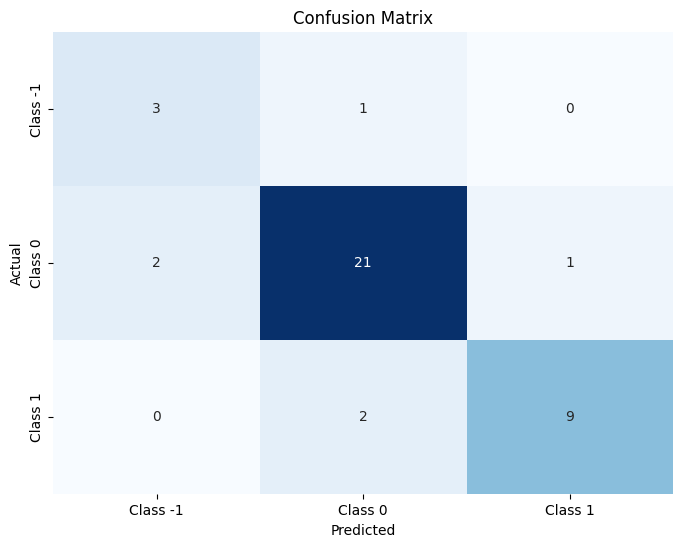

In [792]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'model' is your trained logistic regression model
# and 'X_test' and 'y_test' are your test set features and labels

# Make predictions
predictions_2 = model.predict(X_test)
predicted_classes_2 = np.argmax(predictions_2, axis=1)
predicted_classes_2=np.where(predicted_classes_2 == 2, -1, np.where(predicted_classes_2 ==1, 1, 0))
confusion_matrix_graph(y_test1, predicted_classes_2)



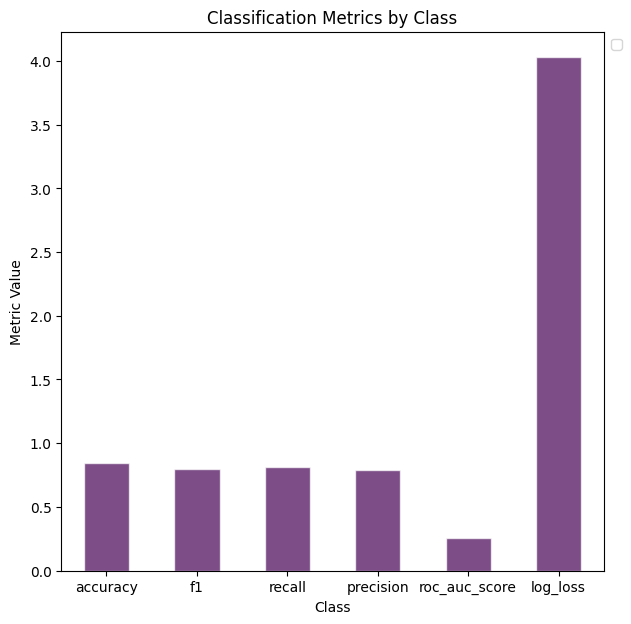

accuracy         0.846154
f1               0.799603
recall           0.814394
precision        0.791667
roc_auc_score    0.255524
log_loss         4.028539
dtype: float64

In [793]:
metricas(y_test1,predicted_classes_2,predictions_2)


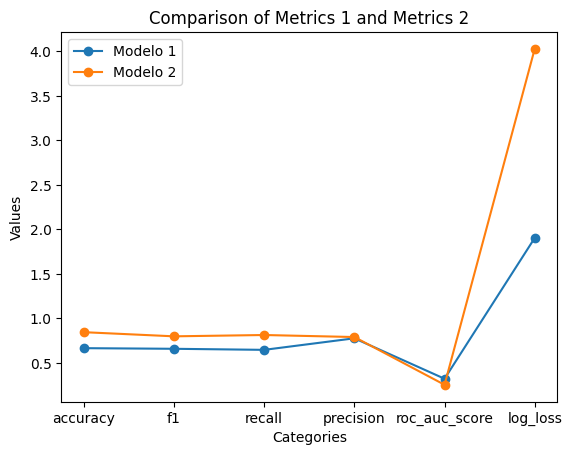

,modelos 1,Modelos 2
accuracy,0.666667,0.846154
f1,0.659673,0.799603
recall,0.647727,0.814394
precision,0.777451,0.791667
roc_auc_score,0.323390,0.255524
log_loss,1.904556,4.028539


In [794]:
metricas_comparacion(y_test1,predicted_classes_1,predictions_1,predicted_classes_2,predictions_2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


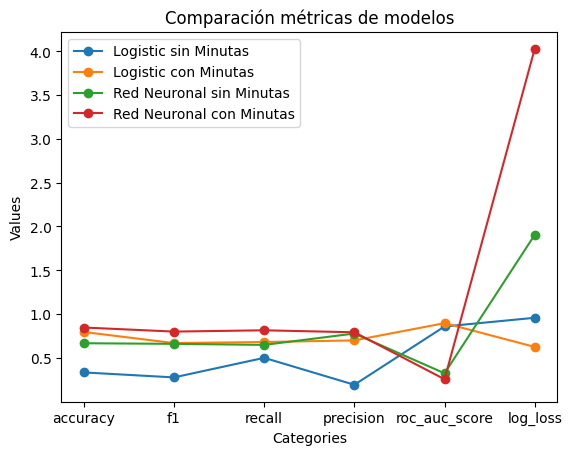

,Logistic sin Minutas,Logistic con Minutas,Red Neuronal sin Minutas,Red Neuronal con Minutas
accuracy,0.333333,0.794872,0.666667,0.846154
f1,0.276630,0.668525,0.659673,0.799603
recall,0.500000,0.680556,0.647727,0.814394
precision,0.192308,0.698990,0.777451,0.791667
roc_auc_score,0.858112,0.895833,0.323390,0.255524
log_loss,0.957265,0.624532,1.904556,4.028539


In [795]:
metricas_comparacion_1(y_test1,y_pred_1,y_prob_1,y_pred_2,y_prob_2, predicted_classes_1,predictions_1,predicted_classes_2,predictions_2)

Accuracy: 0.8205
ROC AUC: 0.9142


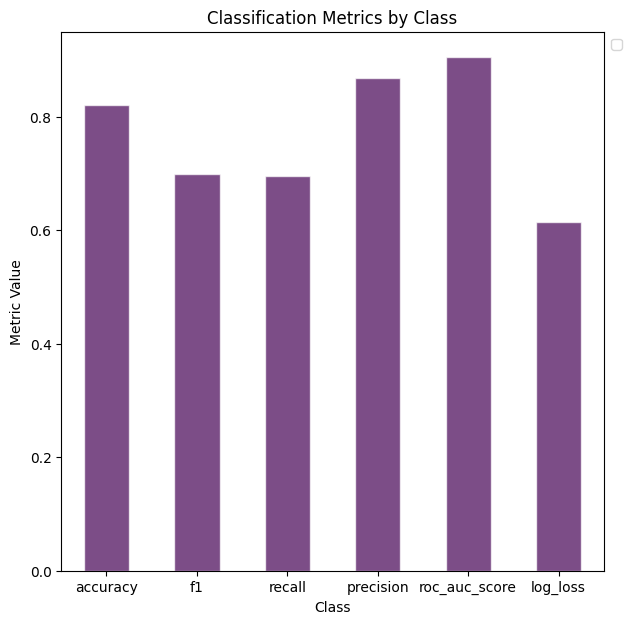

accuracy         0.820513
f1               0.699073
recall           0.694444
precision        0.867633
roc_auc_score    0.904514
log_loss         0.613776
dtype: float64

In [796]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_predict

# Assuming you have already imported necessary libraries and have your data ready



# Create a logistic regression model
lr = LogisticRegression(random_state=42,max_iter=1000, solver='sag')

# Create a StratifiedKFold object for balanced cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predicted probabilities
y_prob_2_cv = cross_val_predict(lr, X_train_smote, y_train_smote, cv=stratified_kfold, method='predict_proba')

# Fit the model on the entire training set after cross-validation
lr.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_2 = lr.predict(X_test)
y_prob_2 = lr.predict_proba(X_test)

# Calculate metrics if needed (e.g., accuracy, ROC AUC)
accuracy = accuracy_score(y_test1, y_pred_2)
roc_auc = roc_auc_score(y_test1, y_prob_2, multi_class='ovr')

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

metricas(y_test1,y_pred_2,y_prob_2)

In [797]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import tensorflow as tf

# Assuming you have already imported necessary libraries and have your data ready

# Encode your target variable if it's categorical


# Apply SMOTE to your training data


# Create a neural network model
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

patience = 20
learning_rate = 0.001
MAX_EPOCHS = 500

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=patience,
    mode='max',
    restore_best_weights=True
)

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

dense.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Create a StratifiedKFold object for balanced cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in stratified_kfold.split(X_train_smote, y_train_smote):
    X_train_fold, X_val_fold = X_train_smote.iloc[train_index], X_train_smote.iloc[test_index]
    y_train_fold, y_val_fold = y_train_smote[train_index], y_train_smote[test_index]

    # Train the neural network model
    history = dense.fit(X_train_fold, y_train_fold, epochs=MAX_EPOCHS, validation_data=(X_val_fold, y_val_fold), batch_size=30, callbacks=[early_stopping])

# Evaluate the model on the test set
y_pred_nn = dense.predict(X_test)
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1).numpy()



Epoch 1/500
11/11 [==============================] - 1s 22ms/step - loss: nan - accuracy: 0.3344 - val_loss: nan - val_accuracy: 0.3418
Epoch 2/500
11/11 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.3312 - val_loss: nan - val_accuracy: 0.3418
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3312 - val_loss: nan - val_accuracy: 0.3418
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3312 - val_loss: nan - val_accuracy: 0.3418
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3312 - val_loss: nan - val_accuracy: 0.3418
Epoch 6/500
11/11 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3312 - val_loss: nan - val_accuracy: 0.3418
Epoch 7/500
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.3312 - val_loss: nan - val_accuracy: 0.3418
Epoch 8/500
11/11 [==============================] - 0

In [798]:
# Calculate metrics if needed (e.g., accuracy)
accuracy_nn = accuracy_score(y_test1, y_pred_nn_classes)

print(f'Accuracy (Neural Network): {accuracy_nn:.4f}')

Accuracy (Neural Network): 0.6154
